# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este é um projeto proposto pela EBAC, no curso de Cientista de Dados.

O objetivo deste projeto é com base nos dados fornecidos, analisar qual fator influenciara na renda da população e possibilitar predizer, qual será a previsão de renda.

Definição do Problema: Identificar os desafios específicos que a previsão de renda visa resolver. Isso pode envolver a identificação de padrões, variações de renda e fatores que influenciam as mudanças de renda ao longo do tempo.

Objetivos da modelagem: O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a renda.


## Etapa 2 Crisp-DM: Entendimento dos dados

A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela


### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                 | texto        |
| id_cliente              |  Código cliente                                     | inteiro      |
| sexo                    |  Sexo                                               | M/F          |
| posse_de_veiculo        |  Possui veículo	                                    | Y/N          |
| posse_de_imovel         |  Possui imovel                                      | Y/N          |
| qtd_filhos              |  Quantidade de filhos	                            | inteiro      |
| tipo_renda              |  Tipo de renda                                      | texto        |
| educacao                |  Escolaridade                                       | texto        |
| estado_civil            |  Estado civil                                       | texto        |
| tipo_residencia         |  Tipo de residência                                 | texto        |
| idade                   |  Idade                                              | texto        |
| tempo_emprego           |  Tempo de empregado                                 | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | float        |
| renda                   |  Renda                                              | float        |





A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela


#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [47]:
pip install --upgrade pydantic

In [48]:
!pip install ydata_profiling

In [91]:
pip install ipywidgets

In [49]:
import pandas as pd
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [50]:
renda = pd.read_csv("C:\\Users\\eduar\\Desktop\\previsao_de_renda.csv")

In [51]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [52]:
from ydata_profiling import ProfileReport

Analise utilizando Pandas_profiling:

In [54]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


In [55]:
prof.to_file('./output/renda_analisys.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 42.34it/s]


### Entendimento dos dados - Bivariadas




In [56]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

def grafico_plot(var: str):



    plt.figure(figsize=(10,6))
    sns.pointplot(data=renda, x=var, y='renda')
    plt.title(f'Renda média em função de {var}')
    plt.xlabel(var)
    plt.ylabel('Renda média')
    plt.show()


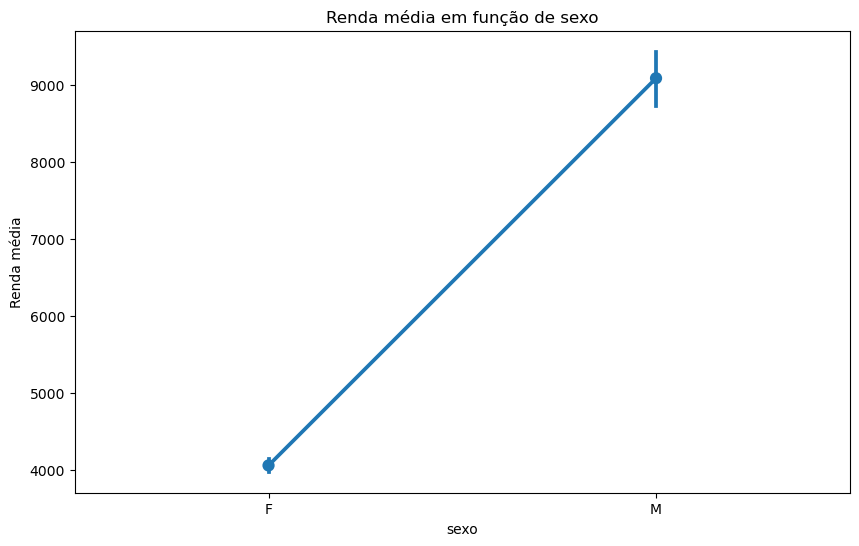

In [58]:
grafico_plot('sexo')

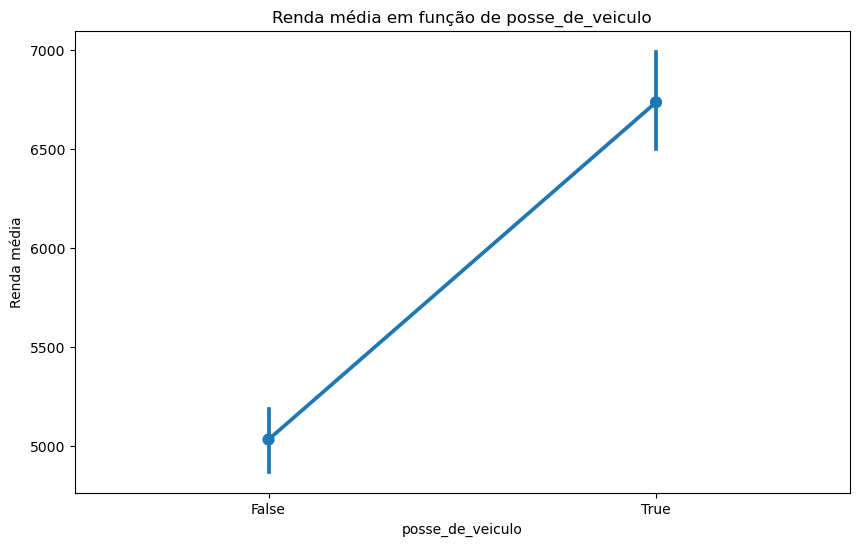

In [59]:
grafico_plot('posse_de_veiculo')

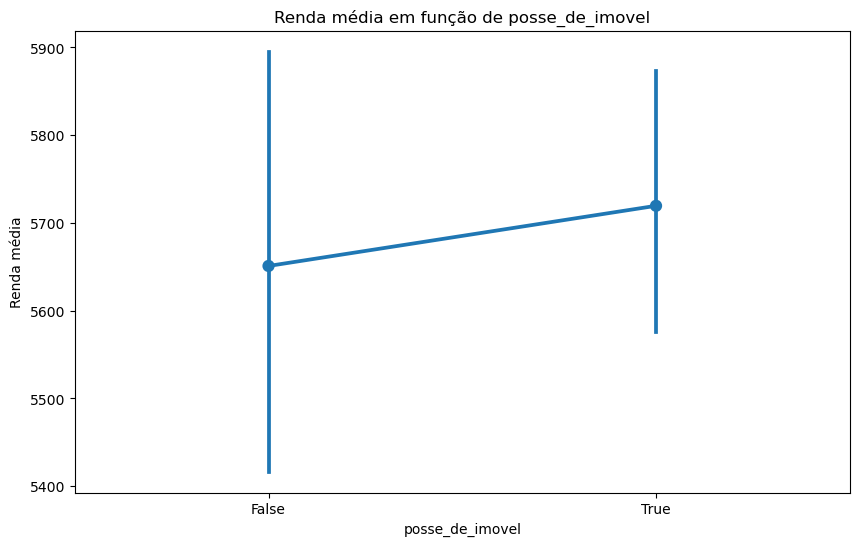

In [60]:
grafico_plot('posse_de_imovel')

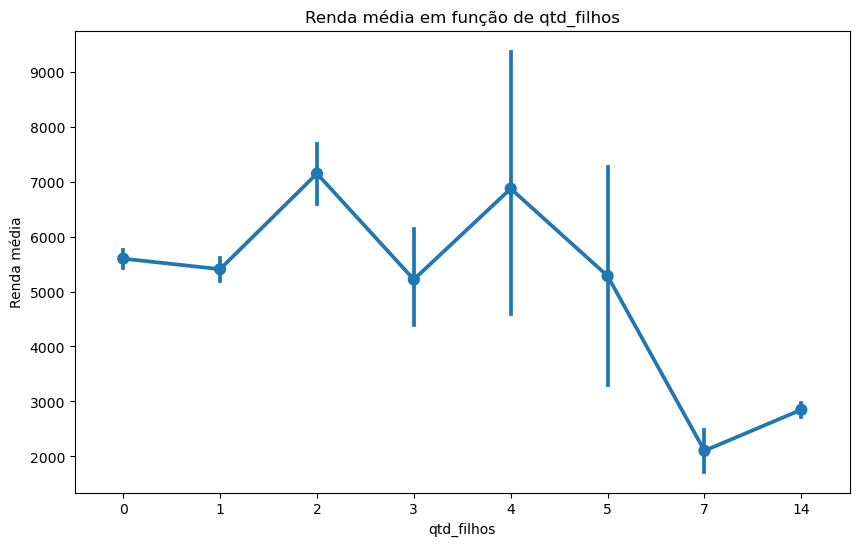

In [61]:
grafico_plot('qtd_filhos')

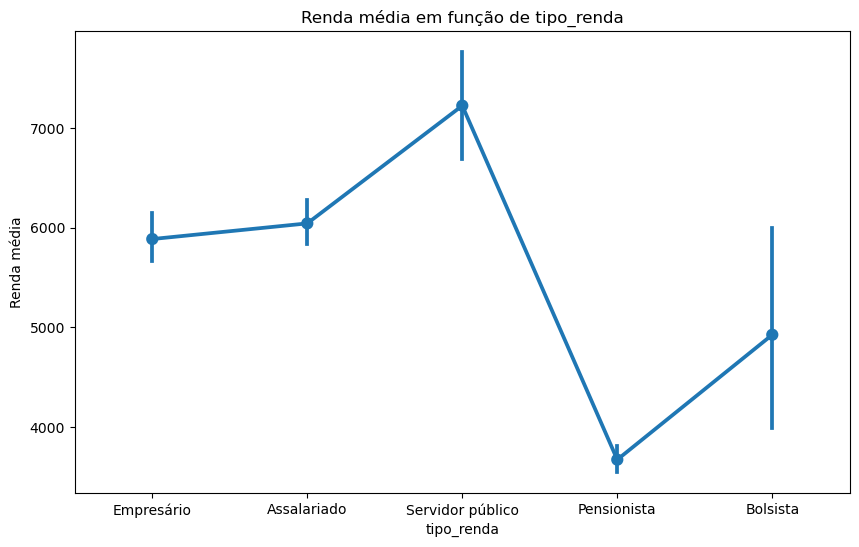

In [62]:
grafico_plot('tipo_renda')

In [63]:
def grafico_bar(var: str):



    plt.figure(figsize=(10,6))
    sns.barplot(data=renda, x=var, y='renda')
    plt.title(f'Renda média em função de {var}')
    plt.xlabel(var)
    plt.ylabel('Renda média')
    plt.show()


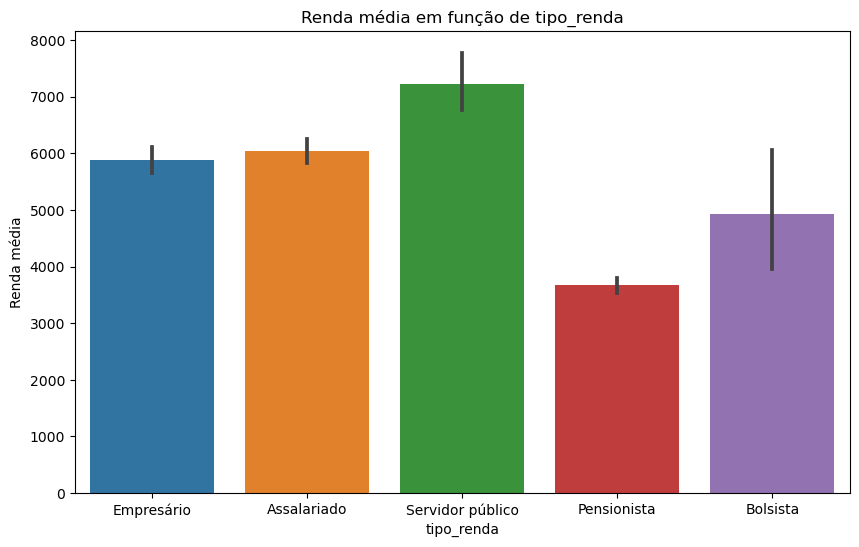

In [64]:
grafico_bar('tipo_renda')

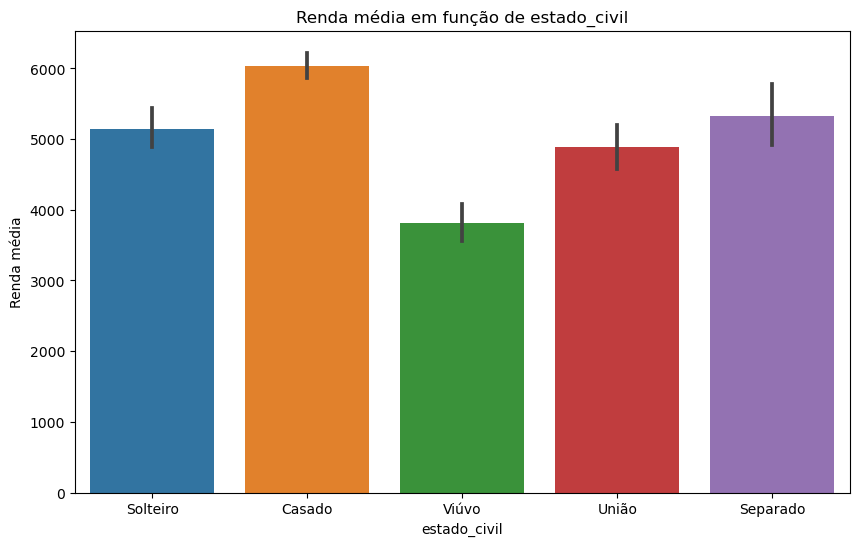

In [65]:
grafico_bar('estado_civil')

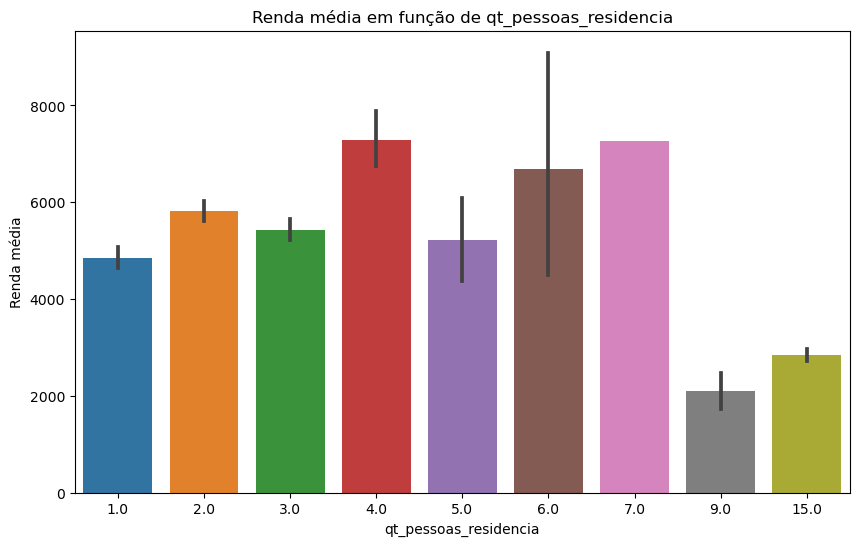

In [66]:
grafico_bar('qt_pessoas_residencia')

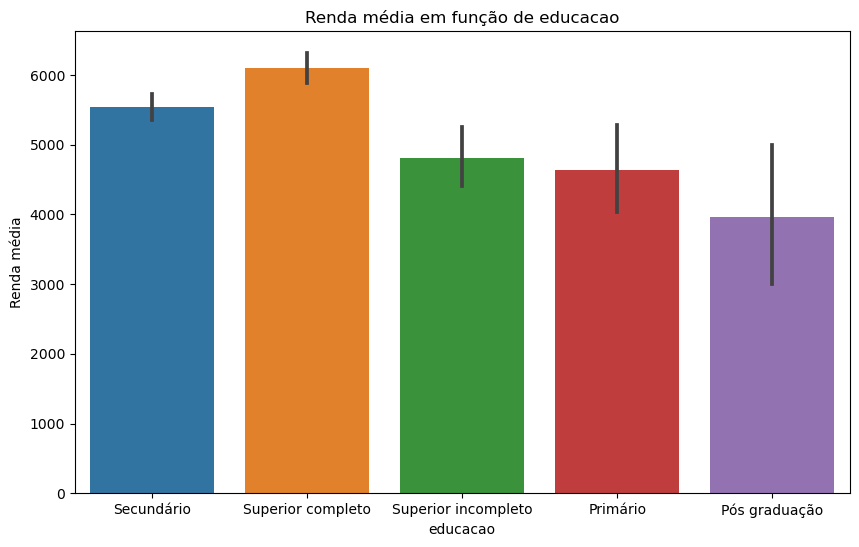

In [67]:
grafico_bar('educacao')

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [68]:
renda.head()


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


Removendo variaves que nao sao necessárias no nosso dataFrame 


In [69]:
renda = renda.drop(['id_cliente', 'Unnamed: 0', 'data_ref'], axis=1)


vimos que na variavel tempo_emprego temos 2573 missing, entao devemos remove-lo para nao ocorrer nenhum erro em nossa analise  

In [70]:
renda.dropna(subset='tempo_emprego', inplace=True)

In [71]:
renda.head(1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


fazendo a trasformaçao dos dados 

In [72]:
y,X = patsy.dmatrices("""renda~sexo 
                    + posse_de_veiculo + qtd_filhos 
                    +  C(tipo_renda) + C(educacao) 
                    +C(estado_civil) + C(tipo_residencia)
                      + idade + tempo_emprego 
                      + qt_pessoas_residencia + renda """, data =renda )


In [73]:
reg = sm.OLS(y,X).fit()

In [74]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.423e+33
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        19:31:38   Log-Likelihood:             3.0819e+05
No. Observations:               12427   AIC:                        -6.163e+05
Df Residuals:                   12402   BIC:                        -6.161e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            7.503e-12   1.34e-12      5.604      0.000    4.88e-12    1.01e-11
sexo[T.M]                            -1.08e-12   8.83e-14    -12.228      0.000   -1.25e-12   -9.07e-13
posse_de_veiculo[T.True]            -2.501e-12   8.05e-14    -31.071      0.000   -2.66e-12   -2.34e-12
C(tipo_renda)[T.Bolsista]           -6.366e-12   1.37e-12     -4.636      0.000   -9.06e-12   -3.67e-12
C(tipo_renda)[T.Empresário]          1.251e-12   8.51e-14     14.688      0.000    1.08e-12    1.42e-12
C(tipo_renda)[T.Pensionista]         1.978e-11   1.37e-12     14.400      0.000    1.71e-11    2.25e-11
C(tipo_renda)[T.Servidor público]    1.251e-12   1.27e-13      9.883      0.000       1e-12     1.5e-12
C(educacao)[T.Pós graduação]        -5.912e-12   9.05e-13     -6.532      0.000   -7.69e-12   -4.14e-12
C(educacao)[T.Secundário]           -6.139e-12    4.1e-13    -14.974      0.000   -6.94e-12   -5.34e-12
C(educacao)[T.Superior completo]     -4.32e-12   4.12e-13    -10.496      0.000   -5.13e-12   -3.51e-12
C(educacao)[T.Superior incompleto]  -4.547e-13   4.43e-13     -1.027      0.304   -1.32e-12    4.13e-13
C(estado_civil)[T.Separado]         -2.899e-12   6.33e-13     -4.576      0.000   -4.14e-12   -1.66e-12
C(estado_civil)[T.Solteiro]         -7.105e-13    6.2e-13     -1.146      0.252   -1.93e-12    5.05e-13
C(estado_civil)[T.União]             1.194e-12   1.43e-13      8.327      0.000    9.13e-13    1.47e-12
C(estado_civil)[T.Viúvo]            -2.842e-12   6.58e-13     -4.318      0.000   -4.13e-12   -1.55e-12
C(tipo_residencia)[T.Casa]          -6.253e-13   3.08e-13     -2.029      0.043   -1.23e-12   -2.11e-14
C(tipo_residencia)[T.Com os pais]   -3.865e-12   3.43e-13    -11.257      0.000   -4.54e-12   -3.19e-12
C(tipo_residencia)[T.Comunitário]   -3.411e-13      6e-13     -0.568      0.570   -1.52e-12    8.35e-13
C(tipo_residencia)[T.Estúdio]        1.592e-12   5.66e-13      2.814      0.005    4.83e-13     2.7e-12
C(tipo_residencia)[T.Governamental]          0   3.75e-13          0      1.000   -7.36e-13    7.36e-13
qtd_filhos                           9.948e-14   6.15e-13      0.162      0.871   -1.11e-12     1.3e-12
idade                                 3.02e-14   4.55e-15      6.636      0.000    2.13e-14    3.91e-14
tempo_emprego                        2.025e-13   6.48e-15     31.230      0.000     1.9e-13    2.15e-13
qt_pessoas_residencia               -1.315e-13   6.14e-13     -0.214      0.830   -1.33e-12    1.07e-12
renda                                   1.0000   4.81e-18   2.08e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                      953.091   Durbin-Watson:                   1.055
Prob(Omnibus)

## Etapa 4 Crisp-DM: Modelagem

Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

- Selecionar a técnica de modelagem

- Desenho do teste

- Avaliação do modelo

**Modelo de Regressão Statsmodels**

O modelo selecionado foi a "Árvore de regressão", da biblioteca statsmodels.

Avaliando quais variaveis tem relevancia.

In [75]:
y, X = patsy.dmatrices("""renda ~ sexo
                         + qtd_filhos + C(tipo_renda)
                         + C(educacao) + C(estado_civil)
                         + idade + tempo_emprego"""
                         , data=renda)

In [76]:
reg = sm.OLS(y,X).fit()

In [77]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     266.5
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        19:31:39   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12410   BIC:                         2.577e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -3200.6858    831.024     -3.851      0.000   -4829.622   -1571.750
sexo[T.M]                           6059.7645    147.511     41.080      0.000    5770.619    6348.910
C(tipo_renda)[T.Bolsista]          -1282.5270   2563.972     -0.500      0.617   -6308.310    3743.256
C(tipo_renda)[T.Empresário]          830.8059    158.539      5.240      0.000     520.045    1141.567
C(tipo_renda)[T.Pensionista]       -2774.1946   2565.004     -1.082      0.279   -7802.000    2253.611
C(tipo_renda)[T.Servidor público]    132.5646    236.092      0.561      0.574    -330.211     595.341
C(educacao)[T.Pós graduação]        1193.5643   1688.093      0.707      0.480   -2115.361    4502.489
C(educacao)[T.Secundário]            595.7575    763.438      0.780      0.435    -900.699    2092.214
C(educacao)[T.Superior completo]    1217.3697    766.689      1.588      0.112    -285.460    2720.199
C(educacao)[T.Superior incompleto]   179.7928    825.374      0.218      0.828   -1438.069    1797.655
C(estado_civil)[T.Separado]         -151.5521    295.997     -0.512      0.609    -731.753     428.648
C(estado_civil)[T.Solteiro]         -430.6793    216.504     -1.989      0.047    -855.060      -6.298
C(estado_civil)[T.União]            -500.6437    266.830     -1.876      0.061   -1023.672      22.384
C(estado_civil)[T.Viúvo]            -208.7953    443.155     -0.471      0.638   -1077.448     659.858
qtd_filhos                           150.2809     92.640      1.622      0.105     -31.308     331.869
idade                                 44.3958      8.392      5.290      0.000      27.946      60.845
tempo_emprego                        554.0978     11.027     50.248      0.000     532.483     575.713
==============================================================================
Omnibus:                    17562.693   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9868000.360
Skew:                           8.120   Prob(JB):                         0.00
Kurtosis:                     140.092   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Criando um novo DataFrame com variaves mais úteis para a nossa analise 

In [78]:
novo_df = ['sexo', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'idade', 'tempo_emprego', 'renda']
data = renda[novo_df]

data.sample(n=3)

,sexo,qtd_filhos,tipo_renda,educacao,estado_civil,idade,tempo_emprego,renda
990,F,0,Assalariado,Secundário,Viúvo,52,5.635616,3508.26
11368,M,1,Servidor público,Superior completo,Casado,29,6.452055,10106.86
198,F,1,Assalariado,Superior completo,Casado,50,27.654795,3792.52


Para iniciar a modelagem dos nossos dados, é necessário realizar uma transformação, uma vez que o próximo modelo que utilizaremos não suporta variáveis dummy no nosso DataFrame

In [79]:
data = pd.get_dummies(data, columns=['tipo_renda','educacao','estado_civil'], dtype=int)
data['sexo'] = data['sexo'].map({ 'F' : 0, 'M' : 1})
data.sample(n=3)

,sexo,qtd_filhos,idade,tempo_emprego,renda,tipo_renda_Assalariado,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Primário,educacao_Pós graduação,educacao_Secundário,educacao_Superior completo,educacao_Superior incompleto,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
8166,1,0,33,1.931507,1264.73,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
12572,1,2,40,0.627397,14064.05,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
6159,1,0,33,1.109589,2521.61,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [80]:
X = data.drop('renda', axis=1)
y = data['renda']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)

### Rodando o modelo


In [81]:
modelo = DecisionTreeRegressor(random_state=42)


In [82]:
# treinando o modelo com o conjunto de dados de treino:

modelo.fit(X_train, y_train)

# Métricas obtidas no conjunto de treino e teste:

print('Conjunto de treino:')
print(f'R^2: {r2_score(y_train, modelo.predict(X_train))}')
print(f'Erro médio absoluto: {round(mean_absolute_error(y_train, modelo.predict(X_train)),2)}')
print('\nConjunto de teste:')
print(f'R^2: {r2_score(y_test, modelo.predict(X_test))}')
print(f'Erro médio absoluto: {round(mean_absolute_error(y_test, modelo.predict(X_test)),2)}')

Conjunto de treino:
R^2: 0.8285436924538891
Erro médio absoluto: 1486.81

Conjunto de teste:
R^2: 0.20313714298560148
Erro médio absoluto: 3200.51


In [83]:
kfold = KFold(n_splits=4, shuffle=True)

# Hiperparâmetros avaliados

parametros = {
    'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
    'max_depth': range(1,12),
    'min_samples_split': range(2,10,2),
    'min_samples_leaf': range(2,10,2)
}

# Otimização buscando melhoria nas métricas r^2 e MSE

search = RandomizedSearchCV(modelo, parametros, scoring=['r2', 'neg_mean_squared_error'], refit='r2', cv=kfold)
resultado = search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", resultado.best_params_)

Melhores parâmetros encontrados: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 4, 'criterion': 'squared_error'}


In [84]:
# Treinando o modelo final:

modelo_final = DecisionTreeRegressor(random_state=42,
                            min_samples_leaf=2,
                            min_samples_split=6,
                            max_depth=5,
                            criterion='squared_error'
                            )

modelo_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=6,
                      random_state=42)

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [85]:
# Métricas obtidas no conjunto de treino e teste:

print('Conjunto de treino:')
print(f'R^2: {r2_score(y_train, modelo_final.predict(X_train))}')
print(f'Erro médio absoluto: {round(mean_absolute_error(y_train, modelo_final.predict(X_train)),2)}')
print('\nConjunto de teste:')
print(f'R^2: {r2_score(y_test, modelo_final.predict(X_test))}')
print(f'Erro médio absoluto: {round(mean_absolute_error(y_test, modelo_final.predict(X_test)),2)}')

Conjunto de treino:
R^2: 0.5507496743439037
Erro médio absoluto: 3345.63

Conjunto de teste:
R^2: 0.3348592424379365
Erro médio absoluto: 3414.4


In [86]:
# Comparação da renda média com o erro médio absoluto:

print('Razão da renda média com o erro médio no conjunto de treino:')
print(renda['renda'].mean()/mean_absolute_error(y_train, modelo_final.predict(X_train)))
print('\nRazão da renda média com o erro médio no conjunto de treino:')
print(renda['renda'].mean()/mean_absolute_error(y_test, modelo_final.predict(X_test)))

Razão da renda média com o erro médio no conjunto de treino:
1.8282174635482618

Razão da renda média com o erro médio no conjunto de treino:
1.7913946027308558


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [87]:
# Determinando os quartis das rendas:

q1, q2, q3 = y.quantile([0.25, 0.5, 0.75])

print('Quartis da renda que serão utilizados na classificação:')
print(round(q1,2), q2, q3)

Quartis da renda que serão utilizados na classificação:
2117.23 3681.05 6846.65


In [88]:
def oferta_cartao(x: pd.DataFrame):
    """
    A função recebe um dataframe contendo as informações bancárias de um cliente
    e retorna o tipo de cartão que será ofertado a ele
    """
    renda_cliente = modelo_final.predict(x)

    if renda_cliente < q1:
        print(f'Renda prevista: {renda_cliente}')
        print('Cartão Bronze')
    elif renda_cliente < q2:
        print(f'Renda prevista: {renda_cliente}')
        print('Cartão Prata')
    else:
        print(f'Renda prevista: {renda_cliente}')
        print('Cartão Ouro')

In [89]:
# Exemplo:

# Pegando uma amostra dos dados:

x_teste = X.sample(n=1)
x_teste

,sexo,qtd_filhos,idade,tempo_emprego,tipo_renda_Assalariado,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Primário,educacao_Pós graduação,educacao_Secundário,educacao_Superior completo,educacao_Superior incompleto,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
3717,1,0,38,10.082192,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [90]:
# Utilizando a função:

oferta_cartao(x_teste)

Renda prevista: [12729.23666667]
Cartão Ouro
